In [2]:
import os
import numpy as np 
import pandas as pd
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir('/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images')
dir_names=["Mild", "Moderate", "No_DR", "Proliferate_DR", "Severe"]

In [4]:
images=[]
labels=[]

In [5]:
for dir in dir_names:
    os.chdir('./'+dir)
    imgs_names=os.listdir()
    for img_name in imgs_names:
        with Image.open(img_name) as image:
            image=np.array(image)
            images.append(image)
            label = "No_DR" if dir == "No_DR" else "DR"
            labels.append(label)
    os.chdir('../')

In [6]:
import seaborn as sns

In [ ]:
sns.countplot(x=labels)

In [9]:
import matplotlib.pyplot as plt

In [10]:
images = np.array(images)
labels = np.array(labels)

# Shuffle the data
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

No_DR


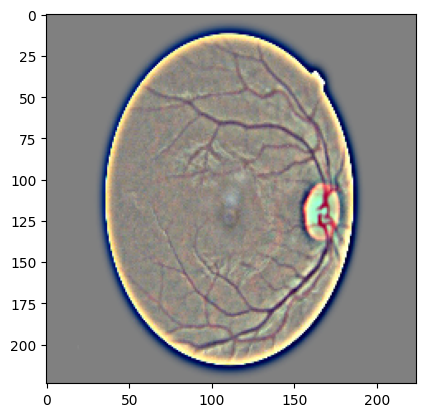

In [11]:
plt.imshow(images[0])
print(labels[0])

In [12]:
images[0].shape

(224, 224, 3)

In [ ]:
np.max(image[0])

196

so we need to scale our images

In [14]:
scaled_images = images/255.
np.max(scaled_images[0])

1.0

No_DR


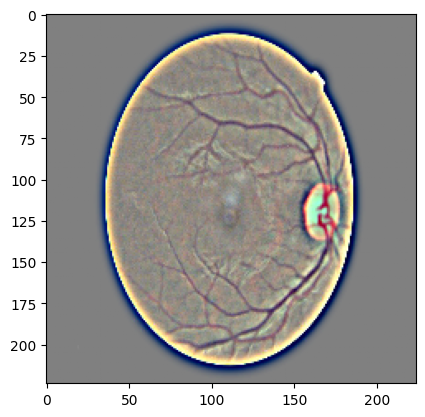

In [15]:
plt.imshow(scaled_images[0])
print(labels[0])

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
labels=encoder.fit_transform(labels)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=.2,random_state=404,stratify=labels)

In [51]:
model = Sequential([
    # Convolutional layer 1
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(224, 224, 3), padding='same'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # Convolutional layer 2
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # Flatten the convolutional layers output
    Flatten(),

    # Fully connected layers
    Dense(120, activation='relu'),

    Dense(84, activation='relu'),

    # Output layer
    Dense(1, activation='sigmoid')  # Using sigmoid activation for binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [52]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [53]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping],shuffle=True)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.5345 - loss: 95.9232 - val_accuracy: 0.6876 - val_loss: 3.0661
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8412 - loss: 1.2661 - val_accuracy: 0.9127 - val_loss: 0.2423
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9362 - loss: 0.2050 - val_accuracy: 0.9250 - val_loss: 0.2060
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9385 - loss: 0.1659 - val_accuracy: 0.9263 - val_loss: 0.2063
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9550 - loss: 0.1242 - val_accuracy: 0.9277 - val_loss: 0.1998
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9737 - loss: 0.0726 - val_accuracy: 0.9277 - val_loss: 0.2368
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9850 - loss: 0.0526 - val_accuracy: 0.9181 - val_loss: 0.2244
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9874 - loss: 0.0415 - val_accuracy: 0.9304 -

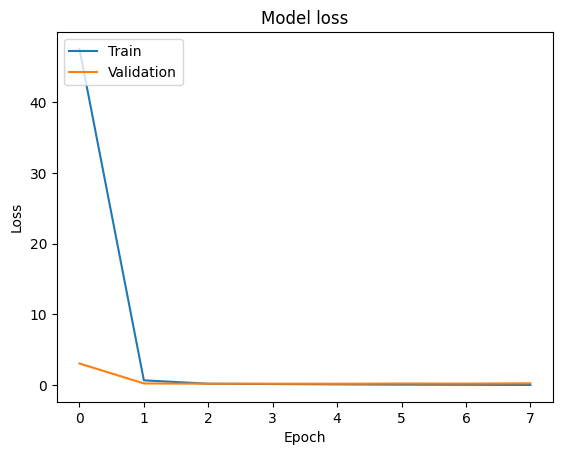

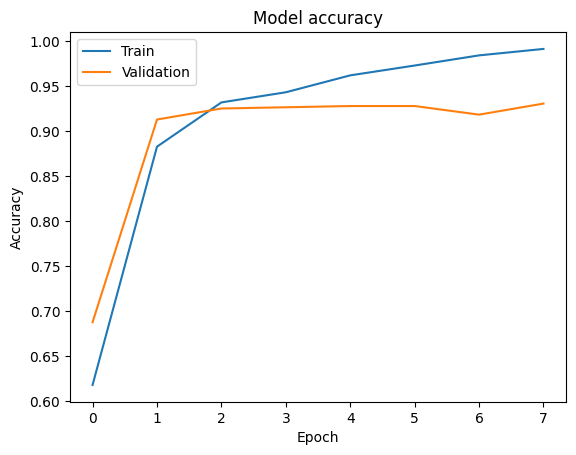

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


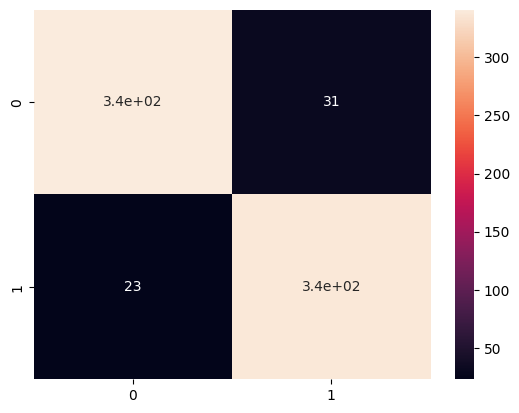

In [49]:
from sklearn.metrics import confusion_matrix
y_pred_probs = model.predict(x_test)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(sns.heatmap(conf_matrix,annot=True))